In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install yellowbrick

In [3]:
house_data=pd.read_csv(r'C:\Users\91911\Documents\Python Scripts\house_data.csv')

In [4]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,house_age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650,59,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639,63,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000,49,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503,28,0


In [5]:
target=house_data['price']

In [6]:
feature=house_data.drop('price',axis=1)

In [29]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  sqft_living15  21613 non-null  int64  
 13  sqft_lot15     21613 non-null  int64  
 14  house_age      21613 non-null  int64  
 15  renovated      21613 non-null  int64  
dtypes: float64(2), int64(14)
memory usage: 2.6 MB


In [7]:
feature.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'house_age',
       'renovated'],
      dtype='object')

In [16]:
from yellowbrick.target import FeatureCorrelation

In [17]:
feature_names=list(feature.columns)

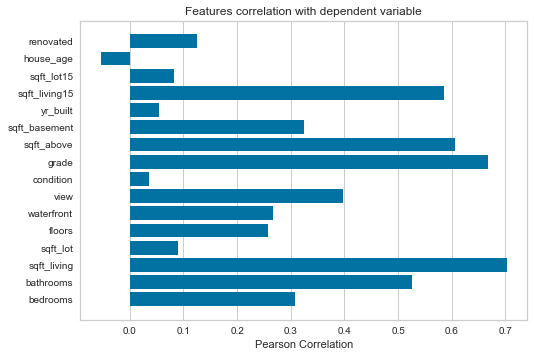

In [18]:
visualizer=FeatureCorrelation( labels= feature_names)
visualizer.fit(feature,target)
visualizer.poof()

In [19]:
from sklearn.feature_selection import SelectKBest

In [20]:
from sklearn.feature_selection import f_regression,mutual_info_regression

In [21]:
selectUnivariate=SelectKBest(f_regression,k=5).fit(feature,target)

In [23]:
feature_masked=selectUnivariate.get_support()

In [24]:
feature_masked

array([False,  True,  True, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False])

In [30]:
selected_features=feature.columns[feature_masked]

In [31]:
selected_features

Index(['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'], dtype='object')

In [34]:
selected_columns=feature[selected_features]

In [35]:
selected_columns.head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,1.00,1180,7,1180,1340
1,2.25,2570,7,2170,1690
2,1.00,770,6,770,2720
3,3.00,1960,7,1050,1360
4,2.00,1680,8,1680,1800


In [36]:
from sklearn.preprocessing import scale

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
feature.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,house_age,renovated
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,1986.552492,12768.455652,43.317818,0.042289
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,685.391304,27304.179631,29.375493,0.201253
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,399.000000,651.000000,-1.000000,0.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1490.000000,5100.000000,18.000000,0.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1840.000000,7620.000000,40.000000,0.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,2360.000000,10083.000000,63.000000,0.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000,115.000000,1.000000


In [44]:
x=pd.DataFrame(data=scale(selected_columns),columns=selected_columns.columns)

In [45]:
y=target

In [47]:
x.describe()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,-1.051951e-15,3.174253e-16,-2.328998e-15,3.892022e-16,-1.506632e-16
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-2.745920e+00,-1.948891e+00,-5.663344e+00,-1.809494e+00,-2.316325e+00
25%,-4.736214e-01,-7.108948e-01,-5.588357e-01,-7.226314e-01,-7.244971e-01
50%,1.756067e-01,-1.849914e-01,-5.588357e-01,-2.758102e-01,-2.138280e-01
75%,5.002207e-01,5.118578e-01,2.919156e-01,5.091458e-01,5.448802e-01
max,7.641730e+00,1.247807e+01,4.545672e+00,9.204044e+00,6.162239e+00


In [49]:
linear_regression=LinearRegression()

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [51]:
linear_regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred=linear_regression.predict(x_test)

In [53]:
df=pd.DataFrame({'Test':y_test,'Predicted':y_pred})

In [54]:
df.sample(10)

,Test,Predicted
15935,470000.0,831700.016031
4946,312500.0,577342.456768
2841,576000.0,330300.939670
3743,312500.0,480311.189591
15251,468000.0,568788.262470
9546,305000.0,424949.388215
6372,850000.0,589829.002285
16739,554000.0,517870.240017
9712,265000.0,398423.265660
17569,1350000.0,779782.300172


In [55]:
from sklearn.metrics import r2_score

In [58]:
score=linear_regression.score(x_train,y_train)
r2score=r2_score(y_test,y_pred)
print("score ",score)
print("r2score",r2score)

score  0.5459539066212522
r2score 0.5340887582532317
